In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-09.TEMP.nc')
plotvar = data.variables['TEMP'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']

In [3]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-09.SALT.nc')
plotvar1 = data1.variables['SALT'][0,:,:]

In [4]:

plotvar1 = plotvar1[:,:300,750]
plotvar1[plotvar1 == -1.0] = np.nan

In [5]:
lont = lont[:300,750]
latt = latt[:300,750]
plotvar = plotvar[:,:300,750]
plotvar[plotvar == -1.0] = np.nan

In [6]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn1/z_t.nc')
A = data1.variables['z_t'][:]/100

In [7]:
data2=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.PD.nc')
PD = data2.variables['PD'][0,:,:]
PD = PD[:,:300,750]
PD[PD == -1.0] = np.nan
PD = (PD-1)*1000

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [8]:
#A = np.arange(62)
#B = np.arange(250)
B=latt
xx, yy = np.meshgrid(B, A)
###############################################################
my_font = {'fontname':'Cambria', 'size':'15'}
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([10,20,30,40,50,70,80,90,100,110,120,130,150,160,170,180,185,190,\
                      195,200,210,220,230,235,250]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-2,-1.8,-1.6,-1.4,-1.2,-1.0,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0,1.2,1.4]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
### 130 white color

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'spacing'
  """
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'fmt'
  


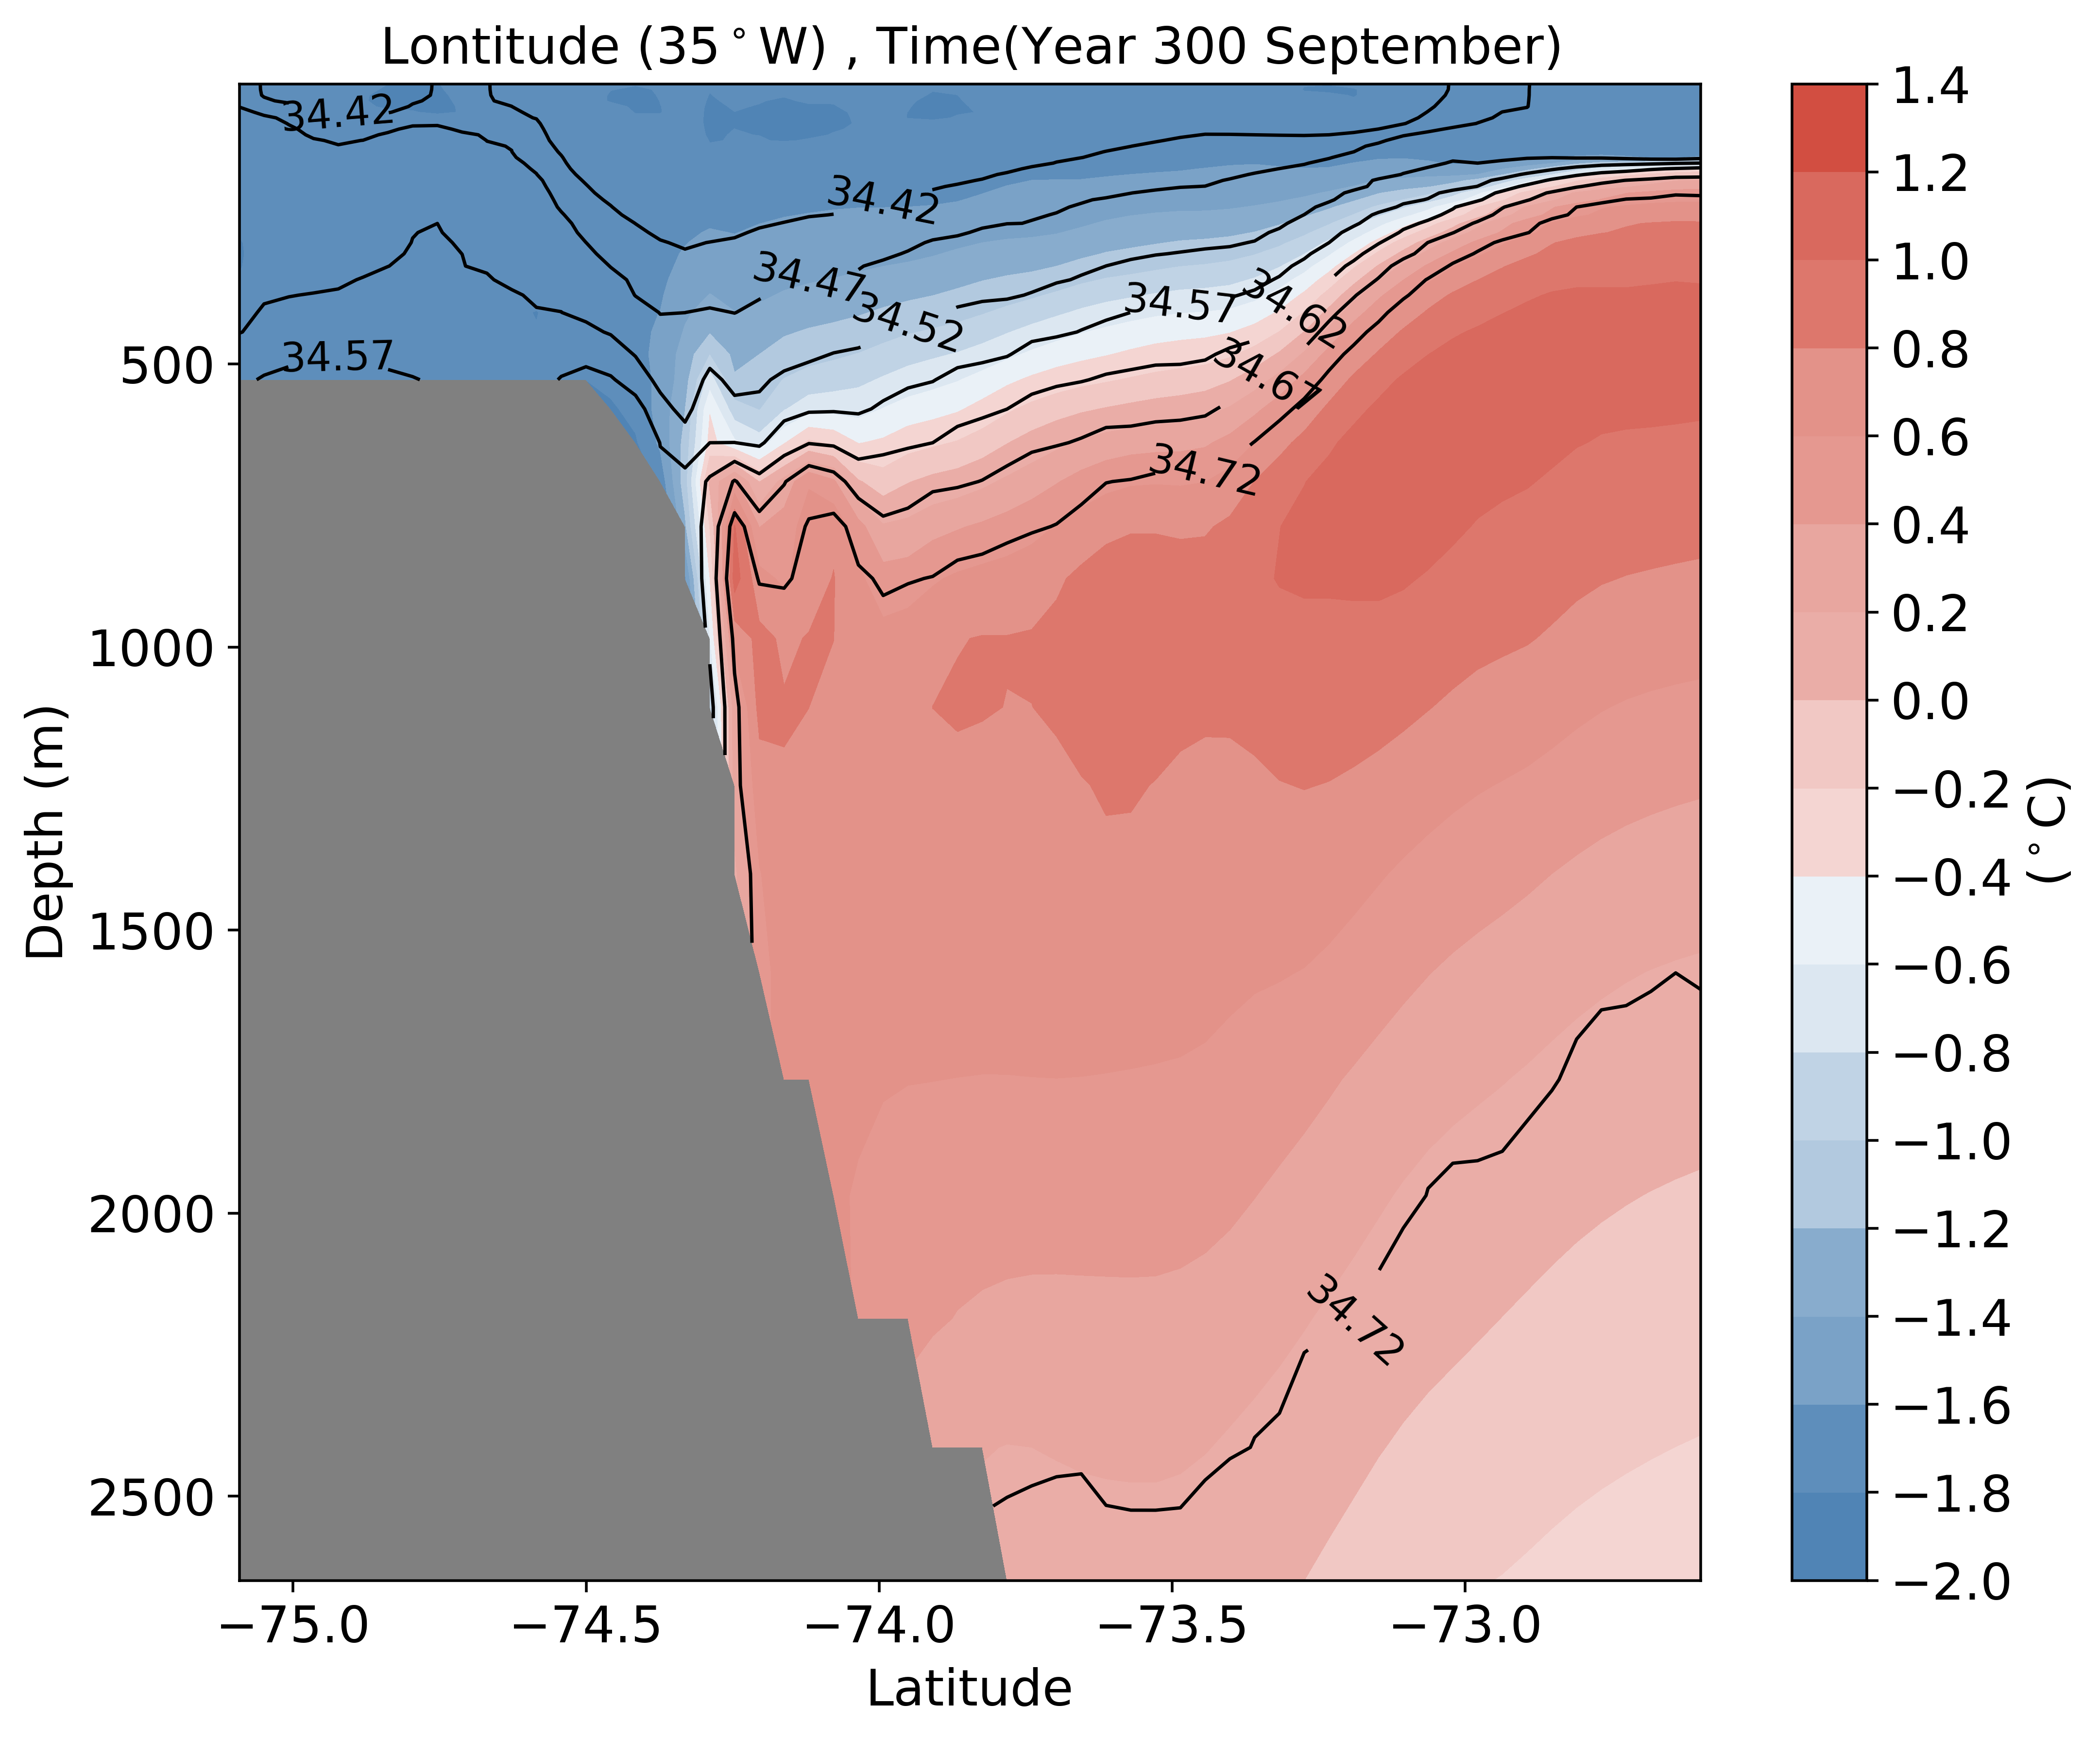

In [10]:
# plot the result
fig = plt.figure(figsize=(9.4, 7.7), dpi=500)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#im = ax0.contourf(xx, yy, plotvar,cmap=new_cmap)
im = ax0.contourf(xx[:49,80:140], yy[:49,80:140], plotvar[:49,80:140],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels)
CS = ax0.contour(xx[:49,80:140], yy[:49,80:140], plotvar1[:49,80:140],[34.42,34.47,34.52,34.57,34.62,34.67,34.72],fmt='%2.2f',colors = 'black', linestyles = 'solid',linewidths=1)
ax0.set_facecolor("grey")
plt.clabel(CS, inline=1,fmt='%2.2f',fontsize=12)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('($^\circ$C)', **my_font)
#ax0.set_title('Mixed Layer Depth')
#############################################################################
##设定X坐标值
plt.xticks(**my_font)#range(0,151,30), ['63$^\circ$W', '60$^\circ$W', '57$^\circ$W', '54$^\circ$W', '51$^\circ$W','48$^\circ$W'])
plt.yticks(**my_font)
#plt.xticks(range(0,151,30), ['63$^\circ$W', '60$^\circ$W', '57$^\circ$W', '54$^\circ$W', '51$^\circ$W','48$^\circ$W'])
#plt.yticks(range(0,46,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968'])#,'3133','4375','5625'])
plt.xlabel('Latitude', **my_font)
plt.ylabel('Depth (m)', **my_font)
plt.gca().invert_yaxis()

ax0.set_title('Lontitude (35$^\circ$W) , Time(Year 300 September)', **my_font)
plt.savefig("s.png",bbox_inches='tight',dpi=fig.dpi)